In [1]:
from myData import *
#from Preprocess import *
import pandas as pd
import numpy as np
from sklearn.metrics import *
from sklearn.preprocessing import LabelEncoder
from sklearn import model_selection as ms
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder

import warnings
warnings.filterwarnings('ignore')
from matplotlib import pyplot as plt
%matplotlib inline


In [2]:
X,y,_= get_data('diabetic_data.csv',labelEncode=False, skewness=False)
df = pd.concat([X,y], axis=1)
df.columns

raw data shape (101766, 50)
['time_in_hospital', 'num_lab_procedures', 'num_procedures', 'num_medications', 'number_outpatient', 'number_emergency', 'number_inpatient', 'number_diagnoses']
['race', 'gender', 'age', 'admission_type_id', 'discharge_disposition_id', 'admission_source_id', 'medical_specialty', 'max_glu_serum', 'A1Cresult', 'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone', 'tolazamide', 'examide', 'citoglipton', 'insulin', 'glyburide-metformin', 'glipizide-metformin', 'glimepiride-pioglitazone', 'metformin-rosiglitazone', 'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted', 'diabetic']
processed data shape: (69973, 43)


Index(['race', 'gender', 'age', 'admission_type_id',
       'discharge_disposition_id', 'admission_source_id', 'time_in_hospital',
       'medical_specialty', 'num_lab_procedures', 'num_procedures',
       'num_medications', 'number_outpatient', 'number_emergency',
       'number_inpatient', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'diabetic',
       'readmitted'],
      dtype='object')

In [3]:
pd.set_option('display.max_columns', 50)
df.head()

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,diabetic,readmitted
0,Caucasian,Female,30-60,2,1,1,8,Cardiology,77,6,33,0,0,0,8,None,None,Steady,No,No,No,No,No,No,Down,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,No,Yes
1,Caucasian,Female,30-60,3,1,1,2,Surgery-Neuro,49,1,11,0,0,0,3,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,No
2,Caucasian,Female,>60,1,3,7,4,InternalMedicine,68,2,23,0,0,0,9,None,>7,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,No,No
3,Caucasian,Female,>60,1,1,7,3,InternalMedicine,46,0,20,0,0,0,9,None,>8,Steady,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Ch,Yes,No,No
4,AfricanAmerican,Female,30-60,1,1,7,5,InternalMedicine,49,0,5,0,0,0,3,None,None,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,Yes,No


Text(0.5, 1.0, 'Race')

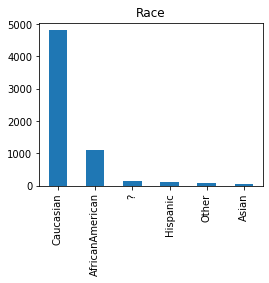

In [4]:
plt.rcParams['figure.figsize']= [4.0, 3.0]
df.loc[df['readmitted'].isin(['1','Yes']),'race'].value_counts().plot(kind='bar')
plt.title('Race')

Text(0.5, 1.0, 'gender')

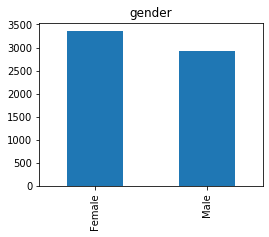

In [5]:
plt.rcParams['figure.figsize']= [4.0, 3.0]
df.loc[df['readmitted'].isin(['1','Yes']),'gender'].value_counts().plot(kind='bar')
plt.title('gender')

Text(0.5, 1.0, 'Age')

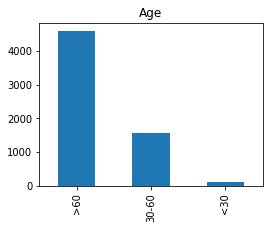

In [6]:
df.loc[df['readmitted'].isin(['1','Yes']),'age'].value_counts().plot(kind='bar')
plt.title("Age")

Text(0.5, 1.0, 'discharge_disposition_id')

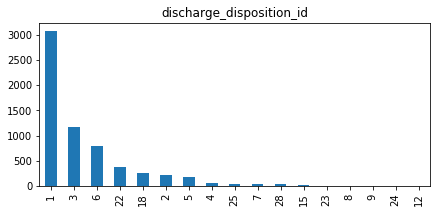

In [7]:
plt.rcParams['figure.figsize']= [7.0, 3.0]
df.loc[df['readmitted'].isin(['1','Yes']),'discharge_disposition_id'].value_counts().plot(kind='bar')
plt.title("discharge_disposition_id")

Text(0.5, 1.0, 'admission_source_id')

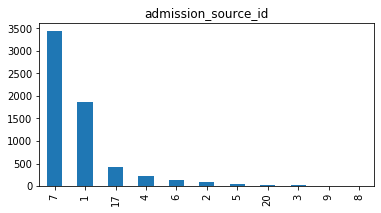

In [8]:
plt.rcParams['figure.figsize']= [6.0, 3.0]
df.loc[df['readmitted'].isin(['1','Yes']),'admission_source_id'].value_counts()[:25].plot(kind='bar')
plt.title("admission_source_id")

Text(0.5, 1.0, 'time_in_hospital')

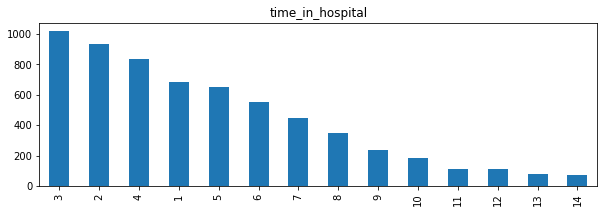

In [9]:
plt.rcParams['figure.figsize']= [10.0, 3.0]
df.loc[df['readmitted'].isin(['1','Yes']),'time_in_hospital'].value_counts()[:25].plot(kind='bar')
plt.title("time_in_hospital")

Text(0.5, 1.0, 'medical_specialty')

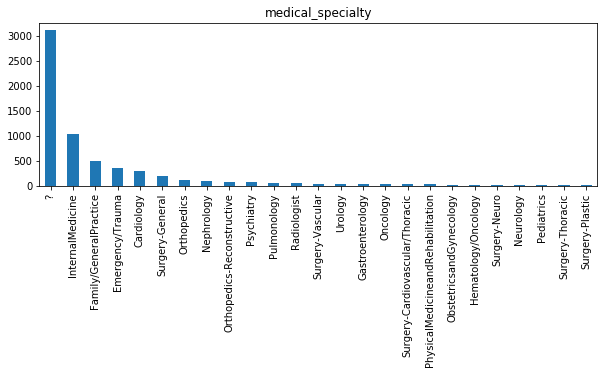

In [10]:
#plt.rcParams['figure.figsize']= [10.0, 3.0]
df.loc[df['readmitted'].isin(['1','Yes']),'medical_specialty'].value_counts()[:25].plot(kind='bar')
plt.title("medical_specialty")

Text(0.5, 1.0, 'num_lab_procedures')

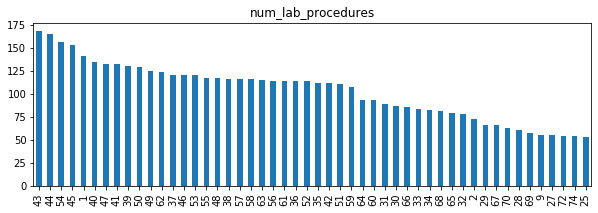

In [11]:
#plt.rcParams['figure.figsize']= [10.0, 3.0]
df.loc[df['readmitted'].isin(['1','Yes']),'num_lab_procedures'].value_counts()[:50].plot(kind='bar')
plt.title("num_lab_procedures")

Text(0.5, 1.0, 'num_procedures')

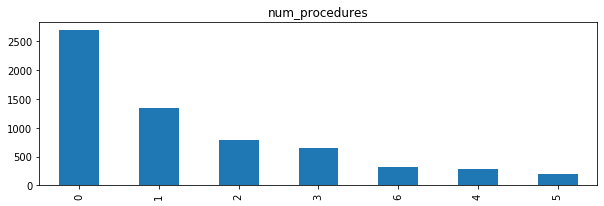

In [12]:
#plt.rcParams['figure.figsize']= [6.0, 3.0]
df.loc[df['readmitted'].isin(['1','Yes']),'num_procedures'].value_counts().plot(kind='bar')
plt.title("num_procedures")

Text(0.5, 1.0, 'num_medications')

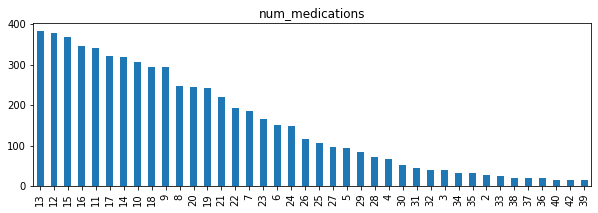

In [13]:
plt.rcParams['figure.figsize']= [10.0, 3.0]
df.loc[df['readmitted'].isin(['1','Yes']),'num_medications'].value_counts()[:40].plot(kind='bar')
plt.title("num_medications")

Text(0.5, 1.0, 'number_emergency')

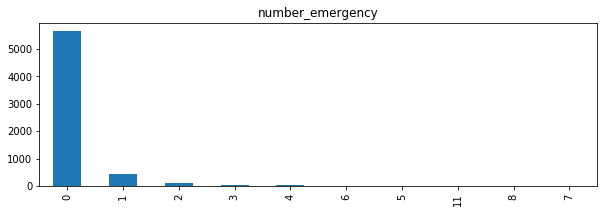

In [14]:
#plt.rcParams['figure.figsize']= [6.0, 4.0]
df.loc[df['readmitted'].isin(['1','Yes']),'number_emergency'].value_counts().plot(kind='bar')
plt.title("number_emergency")

Text(0.5, 1.0, 'number_inpatient')

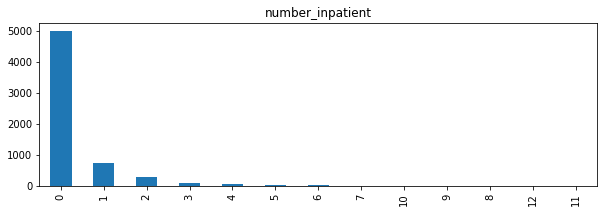

In [15]:
#plt.rcParams['figure.figsize']= [6.0, 4.0]
df.loc[df['readmitted'].isin(['1','Yes']),'number_inpatient'].value_counts().plot(kind='bar')
plt.title("number_inpatient")

Text(0.5, 1.0, 'number_outpatient')

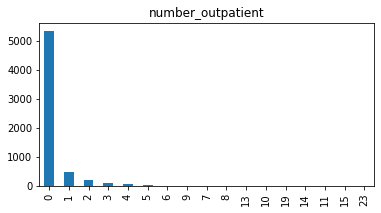

In [16]:
plt.rcParams['figure.figsize']= [6.0, 3.0]
df.loc[df['readmitted'].isin(['1','Yes']),'number_outpatient'].value_counts().plot(kind='bar')
plt.title("number_outpatient")

Text(0.5, 1.0, 'number_diagnoses')

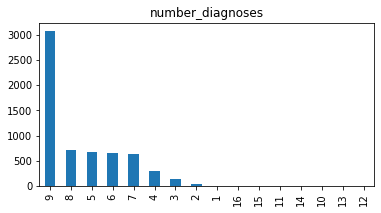

In [17]:
plt.rcParams['figure.figsize']= [6.0, 3.0]
df.loc[df['readmitted'].isin(['1','Yes']),'number_diagnoses'].value_counts().plot(kind='bar')
plt.title("number_diagnoses")

Text(0.5, 1.0, 'number_outpatient')

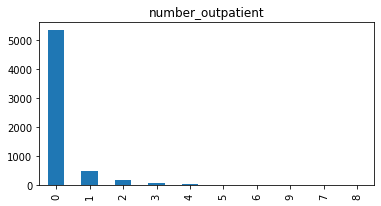

In [18]:
plt.rcParams['figure.figsize']= [6.0, 3.0]
df.loc[df['readmitted'].isin(['1','Yes']),'number_outpatient'].value_counts()[:10].plot(kind='bar')
plt.title("number_outpatient")

Text(0.5, 1.0, 'readmitted')

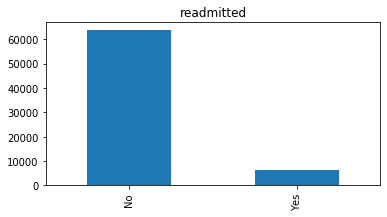

In [21]:
plt.rcParams['figure.figsize']= [6.0, 3.0]
df['readmitted'].value_counts().plot(kind='bar')
plt.title("readmitted")

In [22]:
plt.rcParams['figure.figsize']= [8.0, 5.0]

In [23]:
df,y,labl= get_data('diabetic_data.csv',labelEncode=True, skewness=True)

raw data shape (101766, 50)
['time_in_hospital', 'num_lab_procedures', 'num_procedures', 'num_medications', 'number_outpatient', 'number_emergency', 'number_inpatient', 'number_diagnoses']
['race', 'gender', 'age', 'admission_type_id', 'discharge_disposition_id', 'admission_source_id', 'medical_specialty', 'max_glu_serum', 'A1Cresult', 'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone', 'tolazamide', 'examide', 'citoglipton', 'insulin', 'glyburide-metformin', 'glipizide-metformin', 'glimepiride-pioglitazone', 'metformin-rosiglitazone', 'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted', 'diabetic']
processed data shape: (69973, 43)


#### Full Logistic Model

In [28]:
# Full model

X=df#[['discharge_disposition_id','number_inpatient','time_in_hospital','number_diagnoses','num_lab_procedures']]
X_train, X_test, y_train, y_test = ms.train_test_split(X, y, shuffle=True, test_size=0.2, random_state=42)

print(X_train.shape, X_test.shape)

enc = OneHotEncoder(categories='auto', drop='first', sparse=False)
enc.fit(X)

lm_full = LogisticRegression(solver='saga', class_weight='balanced',max_iter=1000, C=.5, penalty='l2', n_jobs=-1, random_state=42)
lm_full.fit(enc.transform(X_train), y_train)

(55978, 43) (13995, 43)


LogisticRegression(C=0.5, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=1000, multi_class='warn', n_jobs=-1, penalty='l2',
                   random_state=42, solver='saga', tol=0.0001, verbose=0,
                   warm_start=False)

In [11]:
lm_gridSearch = ms.GridSearchCV(lm_full, {'C':np.linspace(.1,.9,9)}, cv=3, scoring='roc_auc')
lm_gridSearch.fit(enc.transform(X_train), y_train)

lm_full = lm_gridSearch.best_estimator_
print(lm_full)

MemoryError: 

In [27]:
y_proba_lm = lm_full.predict_proba(
    enc.transform(X_test))[:, 1]

y_pred_lm = lm_full.predict(enc.transform(X_test))

fpr_lm, tpr_lm, _ = roc_curve(y_test, y_proba_lm)
auc_lm = auc(fpr_lm, tpr_lm)
print(auc_lm)

0.6315972915410751


Text(0.5, 1.0, 'LR Model Coeficients')

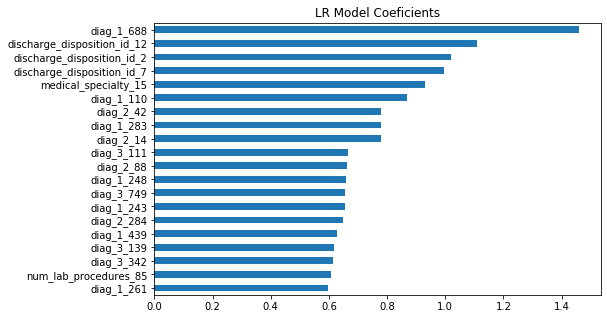

In [27]:
coefs = map_coef(lm_full, enc, X_train.columns, inverse_log=True)
pd.Series(coefs).sort_values().plot(kind='barh')
plt.title('LR Model Coeficients')

In [40]:
print(classification_report(y_test, y_pred_lm))

              precision    recall  f1-score   support

           0       0.93      0.68      0.78     12712
           1       0.14      0.51      0.21      1283

    accuracy                           0.66     13995
   macro avg       0.53      0.59      0.50     13995
weighted avg       0.86      0.66      0.73     13995



(array([ 124.,  865., 2362., 3142., 2926., 2205., 1244.,  737.,  307.,
          83.]),
 array([0.05649734, 0.14647576, 0.23645419, 0.32643262, 0.41641104,
        0.50638947, 0.5963679 , 0.68634632, 0.77632475, 0.86630318,
        0.95628161]),
 <a list of 10 Patch objects>)

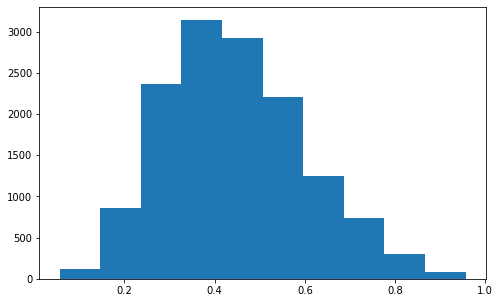

In [41]:
plt.hist(y_proba_lm, bins=10)

In [42]:
result = metrics_table(y_test, y_proba_lm)
result

,quantile,pop,readmitted,min_proba,max_proba,readmit_pct,avg_readmit,lift
0,0,1399,59,0.056497,0.258109,0.004216,0.091676,0.459860
1,1,1400,84,0.258126,0.309736,0.006002,0.091676,0.654716
2,2,1399,76,0.309775,0.352355,0.005431,0.091676,0.592362
3,3,1400,90,0.352410,0.392216,0.006431,0.091676,0.701481
4,4,1399,120,0.392243,0.431593,0.008574,0.091676,0.935308
5,5,1400,121,0.431672,0.473250,0.008646,0.091676,0.943102
6,6,1399,131,0.473295,0.519609,0.009360,0.091676,1.021044
7,7,1400,152,0.519630,0.576543,0.010861,0.091676,1.184723
8,8,1399,176,0.576574,0.658641,0.012576,0.091676,1.371785
9,9,1400,274,0.658755,0.956282,0.019578,0.091676,2.135620


In [49]:
list(range(n,10))

[7, 8, 9]

In [50]:
result['quantile']=result['quantile'].astype(str)

n=7
quantile ='+'.join(str(x) for x in list(range(n,10)))
readmitted = result.loc[n:,'readmitted'].sum()
pop = result.loc[n:,'pop'].sum()
min_proba = result.loc[n:,'min_proba'].min()
max_proba = result.loc[n:,'max_proba'].max()
readmit_pct = result.loc[n:,'readmit_pct'].sum()
avg_admit_rate = result['readmitted'].sum()/result['pop'].sum()
lift = readmit_pct/avg_admit_rate*pop/result['pop'].sum()*100
result.append(pd.Series([quantile, pop, readmitted, min_proba, max_proba, readmit_pct, avg_admit_rate, lift],\
                        index=result.columns).T, ignore_index=True)
#print(lift)

,quantile,pop,readmitted,min_proba,max_proba,readmit_pct,avg_readmit,lift
0,0,1399,59,0.056497,0.258109,0.004216,0.091676,0.459860
1,1,1400,84,0.258126,0.309736,0.006002,0.091676,0.654716
2,2,1399,76,0.309775,0.352355,0.005431,0.091676,0.592362
3,3,1400,90,0.352410,0.392216,0.006431,0.091676,0.701481
4,4,1399,120,0.392243,0.431593,0.008574,0.091676,0.935308
5,5,1400,121,0.431672,0.473250,0.008646,0.091676,0.943102
6,6,1399,131,0.473295,0.519609,0.009360,0.091676,1.021044
7,7,1400,152,0.519630,0.576543,0.010861,0.091676,1.184723
8,8,1399,176,0.576574,0.658641,0.012576,0.091676,1.371785
9,9,1400,274,0.658755,0.956282,0.019578,0.091676,2.135620


In [97]:
print('last two quantiles groups 8+9 \n{}'.format(regroup_lift(result,8)))

last two quantiles groups 8+9 
pop            2799.000000
readmitted      452.000000
min_proba         0.566093
max_proba         0.945400
readmit_pct       0.032297
avg_readmit       0.091676
lift              7.045986
dtype: float64


#### Reduced Model

In [51]:
# Reduced model

X=df[['discharge_disposition_id','number_inpatient','time_in_hospital','number_diagnoses','num_lab_procedures']]
X_train, X_test, y_train, y_test = ms.train_test_split(X, y, shuffle=True, test_size=0.2, random_state=42)

print(X_train.shape, X_test.shape)

enc = OneHotEncoder(categories='auto', sparse=False)
enc.fit(X)

lm = LogisticRegression(solver='saga', class_weight='balanced',max_iter=1000, C=.1, penalty='l2', n_jobs=-1, random_state=42)
lm.fit(enc.transform(X_train), y_train)

(55978, 5) (13995, 5)


LogisticRegression(C=0.1, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=1000, multi_class='warn', n_jobs=-1, penalty='l2',
                   random_state=42, solver='saga', tol=0.0001, verbose=0,
                   warm_start=False)

In [60]:
lm_gridSearch = ms.GridSearchCV(lm, {'C':np.linspace(.1,.9,9)}, cv=3, scoring='roc_auc', n_jobs=-1)
lm_gridSearch.fit(enc.transform(X_train), y_train)

lm = lm_gridSearch.best_estimator_
print(lm)

LogisticRegression(C=0.1, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=1000, multi_class='warn', n_jobs=-1, penalty='l2',
                   random_state=42, solver='saga', tol=0.0001, verbose=0,
                   warm_start=False)


In [61]:
y_proba_lm = lm.predict_proba(
    enc.transform(X_test))[:, 1]

y_pred_lm = lm.predict(enc.transform(X_test))

fpr_lm, tpr_lm, _ = roc_curve(y_test, y_proba_lm)
auc_lm = auc(fpr_lm, tpr_lm)
print(auc_lm)

0.622755510041512


Text(0.5, 1.0, 'LR Model Coeficients')

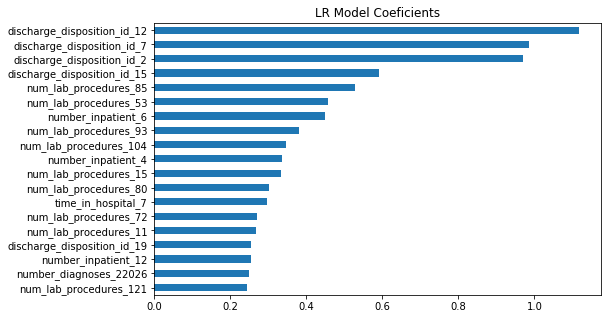

In [62]:
coefs = map_coef(lm, enc, X_train.columns, inverse_log=True)
pd.Series(coefs).sort_values().plot(kind='barh')
plt.title('LR Model Coeficients')

In [63]:
print(classification_report(y_test, y_pred_lm))

              precision    recall  f1-score   support

           0       0.93      0.69      0.79     12712
           1       0.14      0.49      0.21      1283

    accuracy                           0.67     13995
   macro avg       0.53      0.59      0.50     13995
weighted avg       0.86      0.67      0.74     13995



(array([  63.,  590., 3932., 4220., 2182., 1589.,  754.,  440.,  197.,
          28.]),
 array([0.17050311, 0.24799284, 0.32548256, 0.40297229, 0.48046201,
        0.55795174, 0.63544146, 0.71293119, 0.79042091, 0.86791064,
        0.94540036]),
 <a list of 10 Patch objects>)

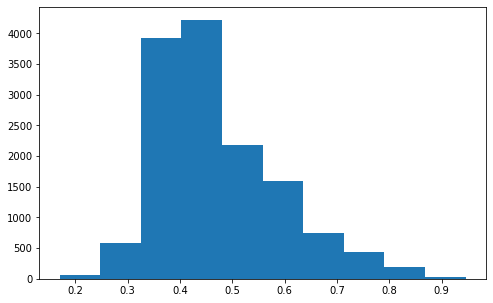

In [64]:
plt.hist(y_proba_lm, bins=10)

In [73]:
result = metrics_table(y_test, y_proba_lm)
result

,quantile,pop,readmitted,min_proba,max_proba,readmit_pct,avg_readmit,lift
0,0,1399,75,0.170503,0.351486,0.005359,0.091676,0.584567
1,1,1400,88,0.351486,0.378069,0.006288,0.091676,0.685892
2,2,1399,79,0.378069,0.398746,0.005645,0.091676,0.615744
3,3,1400,96,0.398819,0.416807,0.006860,0.091676,0.748246
4,4,1399,95,0.416810,0.437794,0.006788,0.091676,0.740452
5,5,1400,128,0.437794,0.469690,0.009146,0.091676,0.997662
6,6,1399,136,0.469695,0.513812,0.009718,0.091676,1.060016
7,7,1400,134,0.513832,0.566089,0.009575,0.091676,1.044427
8,8,1399,187,0.566093,0.636644,0.013362,0.091676,1.457521
9,9,1400,265,0.636666,0.945400,0.018935,0.091676,2.065472


In [94]:
def regroup_lift(data, start_quan):
    
    data['quantile']=data['quantile'].astype(str)

    n=start_quan
    quantile ='+'.join(str(x) for x in list(range(n,10)))
   # print(quantile)
    readmitted = data.loc[n:,'readmitted'].sum()
    pop = data.loc[n:,'pop'].sum()
    min_proba = data.loc[n:,'min_proba'].min()
    max_proba = data.loc[n:,'max_proba'].max()
    readmit_pct = data.loc[n:,'readmit_pct'].sum()
    avg_admit_rate = data['readmitted'].sum()/result['pop'].sum()
    lift = readmit_pct/avg_admit_rate*pop/data['pop'].sum()*100
    new_row = pd.Series([pop, readmitted, min_proba, max_proba, readmit_pct, avg_admit_rate, lift],\
                            index=result.columns[1:])
    #print(new_row)
    return new_row
#

In [97]:
print('last two quantiles groups 8+9 \n{}'.format(regroup_lift(result,8)))

last two quantiles groups 8+9 
pop            2799.000000
readmitted      452.000000
min_proba         0.566093
max_proba         0.945400
readmit_pct       0.032297
avg_readmit       0.091676
lift              7.045986
dtype: float64
